## Key Features

* Time Coverage: January 2015 – September 2025 (monthly records)
* Content: Federal and Native American land oil & natural gas production and disposition volumes.
* Columns (10 of 11): Production Date, Land Class, Land Category, State, County, FIPS Code,, Commodity, Disposition Code & Description, Volume.
* Status: This is the raw, unprocessed version. Missing values and formatting are preserved exactly as in the official source.
* License: Creative Commons CCZero (Public Domain).

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/')
df.head()

# Data Preprocessing

In [2]:
df.info()

> There are around 47k rows with no missing values

In [4]:
list(df.isna().sum()) # List as here looking like table is not useful enough

In [5]:
df['Land Class'].value_counts() # 3 unique values including Federal, Native American and Mixed Exploratory

In [6]:
df['Land Category'].value_counts() # 2 unique values including Onshore and Offshore

> And so many other categorical values

In [11]:
import seaborn as sns
sns.catplot(x='Land Class', kind='count', hue='Land Category',data=df)

In [18]:
plt.figure(figsize=(10,10))
plt.title('Count of Oil and Gas Production by State')
sns.countplot(x='State',data=df)
plt.xticks(rotation=45)
plt.show();

In [19]:
sns.catplot(x='Commodity', kind='count', hue='Land Category',data=df)

In [20]:
df['Disposition Code'].value_counts()

In [42]:
plt.figure(figsize=(10,10))
df.groupby(by=['Disposition Code'])['Disposition Description'].size().plot(kind='bar')
plt.title('Count of Disposition Code vs Description')
plt.xlabel('Disposition Code')
plt.ylabel('Count')
plt.yscale('log')
plt.show();

In [44]:
len(df['Disposition Code'].value_counts()) , len(df['Disposition Description'].value_counts())

In [64]:
# Commodity vs Volume
plt.figure(figsize=(10,10))
sns.countplot(x='Commodity', data=df)
plt.title('Commodity vs Volume')
plt.show();

In [61]:
# Change volume to int
df['Volume'] = df['Volume'].str.replace(',', '', regex=True).astype(int)

In [62]:
state_volume = df.groupby(by=['State'])['Volume'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Volume Produced per State')
plt.xlabel('State')
plt.ylabel('Total Volume')
plt.show();

> Most oil is from Offshore, and places like New Mexico, Wyoming, Colorado, Utah, North and Texas Dakota are top oil producers

In [66]:
df.groupby(by=['Land Class'])['Volume'].sum()

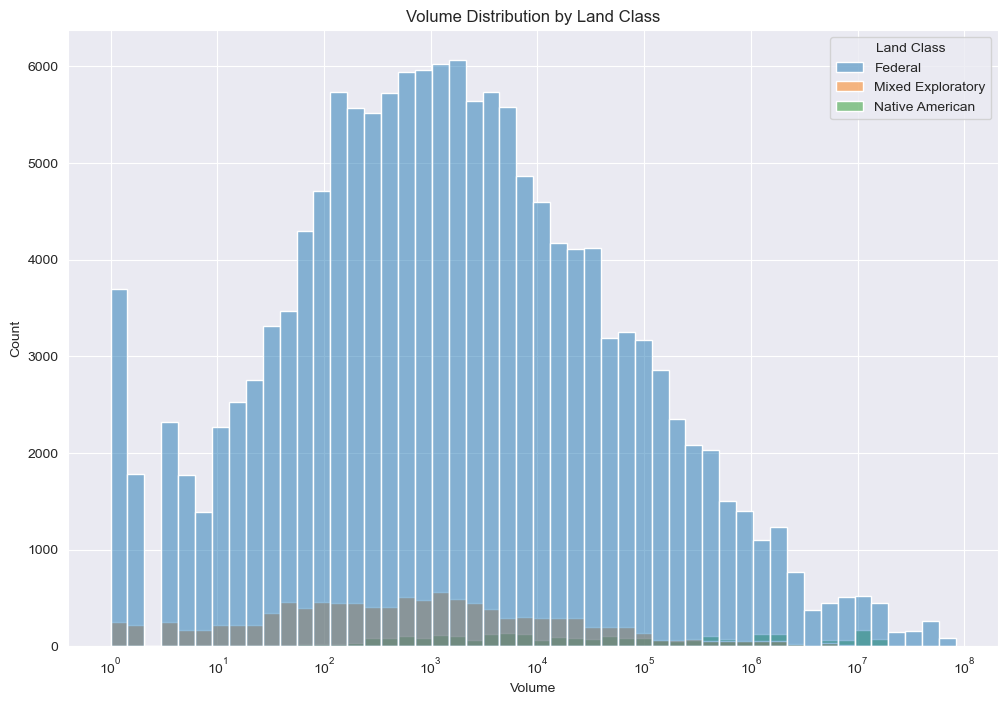

In [72]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Volume', hue='Land Class', log_scale=True, bins=50)
plt.title('Volume Distribution by Land Class')
plt.xlabel('Volume')
plt.ylabel('Count')
plt.show();

In [ ]:
sns.histplot(df, x='Volume')